##  Ley de Hooke

En Técnicas Experimentales I, habéis realizado la práctica 5 (y 6) sobre la Ley de Hooke y el oscilador armónico. En una primera parte habéis medido la elongación del muelle en función de la masa con el fin de determinar la constante del muelle por el método estático. En una segunda parte, habéis estudiado la variación de la posición, velocidad y aceleración entorno a la posición de equilibrio, con el fin de determinar la constante del muelle por el método dinámico.   

1. Representar en una gráfica el peso en función del alargamiento según el apartado a). Calcular la pendiente de la recta que, según la ecuación (1), será la constante de elasticidad k.
2. Crear una gráfica en la que se represente, x(t), v(t) y a(t) según el apartado b). Comprobar que tienen el mismo periodo, pero están desfasadas v(t) y a(t), T/4 y T/2 respectivamente de x(t). Medir también las amplitudes y compararlas con los valores teóricos.
3. Representar la fuerza frente a la posición según el apartado b). Hacer un ajuste lineal para determinar el valor de la constante de elasticidad.
4. Representar T2 frente a la masa incluyendo la del portapesas, que tiene 9,8 g, según el apartado c). Determinar su pendiente y deducir de ella el valor de la constante del muelle.


####  Preliminares

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def calculaErroresAjuste(y, cov, infodict): 
    # Calculamos el error cuadrático residual (ver guion)
    E = (infodict['fvec']**2).sum()
    
    # Estimamos la bondad del ajuste con r² (ver guion)
    r2 = 1-E/((y-y.mean())**2).sum() 
    
    # Estimamos los errores estándar de los parámetros
    perr = np.sqrt(cov.diagonal())
    
    return E,r2,perr

def imprime (nombre, p, perr, r2, E):
    '''
    Esta función imprime los resultados del ajuste con sus errores
    '''
    n = p.size
    print("====================================")
    print("Ajuste usando la función %s" % nombre)
    print("Error cuadrático residual total = %16.6e" % E)
    for i in range(n):
        print("p[%d] = %12.4e +- %12.4e (%6.2f%%)" %
        (i, p[i], perr[i], 100*abs(perr[i]/p[i])))
    print("r2 = %10.6f" % r2)
    
# Función para pintar las gráficas de manera homogénea  
def pinta(subpl, titulo, color, xdata, ydata, xajuste, yajuste, r2, E,xlabel="x",ylabel="y"):
    '''
    Esta función pinta las subgráficas con un estilo homogéneo.
    Argumentos:
    * subpl: Subplot que se usará (1-4)
    * titulo: Título de la gráfica
    * color: Color de la gráfica del ajuste
    * xdata, ydata: Conjuto de puntos de los datos
    * xajuste, yajuste: Conunto de puntos del ajuste
    * r2: Parámetro r² del ajuste
    * E: Error cuadrático residual del ajuste
    '''
    
    # Nos movemos al subplot correspondiente
    #   plt.subplot(2,2,subpl)

    # Pintamos los datos y la gráfica del ajuste
    plt.plot(xajuste, yajuste)
    plt.plot(xdata, ydata, 'or', alpha = 0.5)

    # Título (con color) y etiquetas de los ejes 
    plt.title(titulo, color=color) 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Rejilla
    plt.grid()

    # Creamos una cadena de caracteres con el texto que queremos
    # añadir a la gráfica. Atención al salto de línea.
    text = 'r² = %.4f\nE  = %6.4f'%(r2,E)
    
    # Usamos text para poner el texto. 
    # * La opción bbox nos añade un recuadro (bounding box) alrededor. 
    # * Podemos cambiar el color del fondo del recuadro con facecolor.
    # * Para poner el recuadro en el mismo sitio en coordenadas relativas
    #   (sin depender de la escala del gráfico) podemos usar el parámetro
    #   transform=plt.gca().transAxes
    plt.text(0.05, 0.8, text, transform=plt.gca().transAxes, color=color, bbox=dict(facecolor='w'))
    

def pol1(x,p0,p1):
    return p0 + x*p1

def sinfunc(t,A,omega,phi,shift):
    return A*np.sin(omega*t+phi)+shift 

def cosfunc(t,A,omega,phi,shift):
    return A*np.cos(omega*t+phi)+shift

#### Gráfica del peso en función de la elongación: 

Ajuste usando la función Método estático
Error cuadrático residual total =     1.425095e-02
p[0] =   1.9261e-01 +-   1.7801e-02 (  9.24%)
p[1] =   3.4497e+00 +-   4.6959e-02 (  1.36%)
r2 =   0.997966


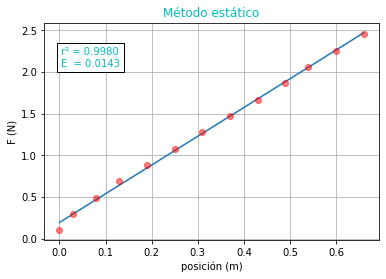

In [7]:
#lectura de datos
datos=np.loadtxt('muelle.csv')

F=datos[:,1]
dL=datos[:,3]

p_sta, cov, infodict, errmsg, ier = curve_fit(pol1, dL, F, p0=[0, 0], full_output=True)
E_sta,r2_sta,perr_sta=calculaErroresAjuste(F, cov, infodict)


imprime('Método estático', p_sta, perr_sta, r2_sta, E_sta)

xdiv = np.linspace(dL[0], dL[-1], 1000)
pinta(1, 'Método estático',     'c', dL,F , xdiv, pol1(xdiv,*p_sta), r2_sta, E_sta,"posición (m)","F (N)")

#### Gráfica de la posición, velocidad y aceleración frente al tiempo: 

Ajuste usando la función Método dinámico
Error cuadrático residual total =     1.266715e-03
p[0] =  -1.4390e-01 +-   5.0294e-04 (  0.35%)
p[1] =   6.2391e+00 +-   1.1945e-03 (  0.02%)
p[2] =   9.2156e-01 +-   7.1252e-03 (  0.77%)
p[3] =  -3.7067e-03 +-   3.5657e-04 (  9.62%)
r2 =   0.999954


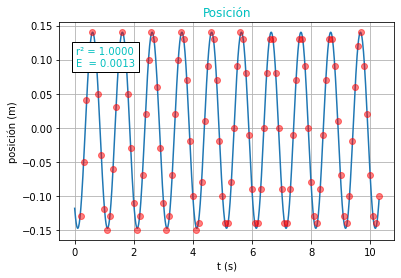

In [8]:
#lectura de datos
# Si los ficheros tienen comas en vez de puntos: sed -i 's/,/\./g' Capstone_Data.txt

# Nesitamos usar pandas, para leer el fichero que os da el Capstone
# Pandas es extremadamente potente, permite leer de una forma muy sencilla csv 
# En este caso es un poco más "complicado" por que hay filas vacías, 
# con la siguiente lógica nos podemos apañar 

# el argumento decimal permite leer el fichero aún cuando el separador decimal 
# es una coma. 
import pandas as pd
datos2=pd.read_csv('datos_posvst.csv',delimiter=';',decimal=',')

tiempo=datos2.t
pos=datos2.pos

p_post, cov, infodict, errmsg, ier = curve_fit(sinfunc, tiempo, pos, p0=[0.5*(np.amax(pos)-np.amin(pos)), 2*np.pi, 0, 0.], full_output=True)
E_post,r2_post,perr_post=calculaErroresAjuste(p_post, cov, infodict)

imprime('Método dinámico', p_post, perr_post, r2_post, E_post)

##Ahora pintamos... 
xdiv = np.linspace(0,np.amax(tiempo),1000)
pinta(2, 'Posición',     'c', tiempo, pos, xdiv, sinfunc(xdiv,*p_post), r2_post, E_post, "t (s)","posición (m)")


## Ahora extraemos la constante elástica del muelle: 


#### Fuerza vs posición (método dinámico)

Ajuste usando la función Método dinámico
Error cuadrático residual total =     1.266715e-03
p[0] =  -1.4390e-01 +-   5.0294e-04 (  0.35%)
p[1] =   6.2391e+00 +-   1.1945e-03 (  0.02%)
p[2] =   9.2156e-01 +-   7.1252e-03 (  0.77%)
p[3] =  -3.7067e-03 +-   3.5657e-04 (  9.62%)
r2 =   0.999954


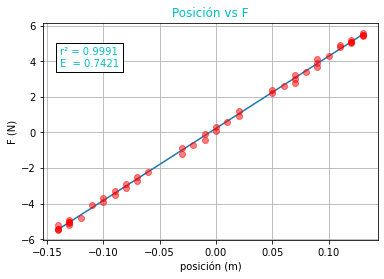

In [10]:
datos2=pd.read_csv('datos_posvsF.csv',delimiter=';',decimal=',')

pos=datos2.X
F=datos2.F

p_posF, cov, infodict, errmsg, ier = curve_fit(pol1, pos, F, p0=[0, 0.], full_output=True)
E_posF,r2_posF,perr_posF=calculaErroresAjuste(p_posF, cov, infodict)

imprime('Método dinámico', p_post, perr_post, r2_post, E_post)

##Ahora pintamos... 
xdiv = np.linspace(np.amin(pos),np.amax(pos),1000)
pinta(3, 'Posición vs F',     'c', pos, F, xdiv, pol1(xdiv,*p_posF), r2_posF, E_posF, "posición (m)", "F (N)")


#### T^2 frente a la masa. Determinación constante del muelle

Ajuste usando la función Método dinámico
Error cuadrático residual total =     9.365179e-03
p[0] =   1.3389e-01 +-   1.4394e-01 (107.50%)
p[1] =   9.0708e-01 +-   1.2192e-01 ( 13.44%)
r2 =   0.968669


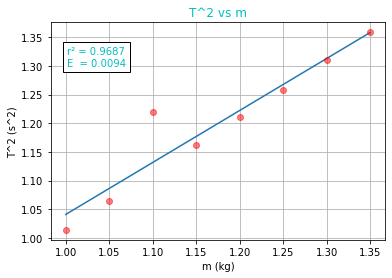

In [9]:
datos2=pd.read_csv('datos_T2.csv',delimiter=';',decimal=',')

m=datos2.m
t2=datos2.T2

p_mt2, cov, infodict, errmsg, ier = curve_fit(pol1, m, t2, p0=[0, 0.], full_output=True)
E_mt2,r2_mt2,perr_mt2=calculaErroresAjuste(p_mt2, cov, infodict)

imprime('Método dinámico', p_mt2, perr_mt2, r2_mt2, E_mt2)

##Ahora pintamos... 
xdiv = np.linspace(np.amin(m),np.amax(m),1000)
pinta(4, 'T^2 vs m','c', m, t2, xdiv, pol1(xdiv,*p_mt2), r2_mt2, E_mt2, "m (kg)", "T^2 (s^2)")
